In [60]:
import pandas as pd
import io
import requests
import datetime
import plotly.express as px

## Get the Timeseries Data

Add documentation about the time series here.

In [61]:
from functions import get_time_series

confirmed, deaths, recovered = get_time_series(local=True)

## Get all the Daily Reports 

Add documentation about these reports here.

In [62]:
from functions import get_daily_reports

daily_report_data, dates = get_daily_reports(local=True)

Failed to load data/03-13-2020.csv
Failed to load data/03-14-2020.csv


## All Done Gathering Data.

Let's merge the time_series_data into one dataframe

In [32]:
from functions import get_date_list
date_list = get_date_list(dates)
print(confirmed.columns)
print(daily_report_data['03-12-2020'].columns)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20'],
      dtype='object')
Index(['Province/State', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered', 'Latitude', 'Longitude'],
      dtype='object')


In [39]:
from math import log
today = daily_report_data['03-12-2020']
fig = px.scatter_geo(
    today,
    lat=today.Latitude,
    lon=today.Longitude,
    size=today.Confirmed
    # size of markers, "pop" is one of the columns of gapminder
)
fig.show()

In [63]:
def totals_by_day(country=None):
    if country == None or country == 'World':
        totals_by_day = pd.DataFrame(
            data={
                'confirmed': [confirmed[date].sum() for date in date_list],
                'deaths': [deaths[date].sum() for date in date_list],
                'recovered': [recovered[date].sum() for date in date_list]
            }, index=date_list)
    else:
        totals_by_day = pd.DataFrame(
        data={
            'confirmed': [
                confirmed.loc[(df['Country/Region'] == country)][date].sum() for date in date_list
            ],
            'deaths': [
                deaths.loc[(df['Country/Region'] == country)][date].sum() for date in date_list
            ],
            'recovered': [
                recovered.loc[(df['Country/Region'] == country)][date].sum() for date in date_list
            ]
        }, index=date_list)

    return totals_by_day

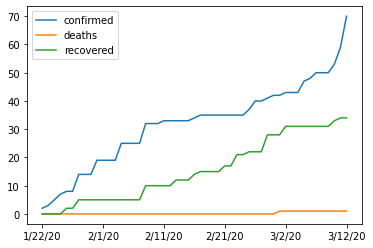

In [64]:
thailand = totals_by_day(country='Thailand')
thailand.plot()

In [68]:
countries = sorted(confirmed['Country/Region'].drop_duplicates())
country_labels = [{'label': country, 'value': country} for country in countries]
print(country_labels)

[{'label': 'Afghanistan', 'value': 'Afghanistan'}, {'label': 'Albania', 'value': 'Albania'}, {'label': 'Algeria', 'value': 'Algeria'}, {'label': 'Andorra', 'value': 'Andorra'}, {'label': 'Argentina', 'value': 'Argentina'}, {'label': 'Armenia', 'value': 'Armenia'}, {'label': 'Australia', 'value': 'Australia'}, {'label': 'Austria', 'value': 'Austria'}, {'label': 'Azerbaijan', 'value': 'Azerbaijan'}, {'label': 'Bahrain', 'value': 'Bahrain'}, {'label': 'Bangladesh', 'value': 'Bangladesh'}, {'label': 'Belarus', 'value': 'Belarus'}, {'label': 'Belgium', 'value': 'Belgium'}, {'label': 'Bhutan', 'value': 'Bhutan'}, {'label': 'Bolivia', 'value': 'Bolivia'}, {'label': 'Bosnia and Herzegovina', 'value': 'Bosnia and Herzegovina'}, {'label': 'Brazil', 'value': 'Brazil'}, {'label': 'Brunei', 'value': 'Brunei'}, {'label': 'Bulgaria', 'value': 'Bulgaria'}, {'label': 'Burkina Faso', 'value': 'Burkina Faso'}, {'label': 'Cambodia', 'value': 'Cambodia'}, {'label': 'Cameroon', 'value': 'Cameroon'}, {'label

In [109]:
start_date = pd.to_datetime('01/22/2020')
end_date = pd.to_datetime('today')
dates = pd.date_range(start_date, end_date)
valid_dates = []
print(confirmed.columns)
for date in dates:
    print(date.strftime('%-m/%-d/%y'))
    if date.strftime('%-m/%-d/%y') in confirmed.columns:
        valid_dates.append(date)
print(valid_dates)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20'],
      dtype='object')
1/22/20
1/23/20
1/24/20
1/25/20
1/26/20
1/27/20
1/28/20
1/29/20
1/30/20
1/31/20
2/1/20
2/2/20
2/3/20
2/4/20
2/5/20
2/6/20
2/7/20
2/8/20
2/9/20
2/10/20
2/11/20
2/12/20
2/13/20
2/14/20
2/15/20
2/16/20
2/17/20
2/18/20
2/19/20
2/20/20
2/21/20
2/22/20
2/23/20
2/24/20
2/25/20
2/26/20
2/27/20
2/28/20
2/29/20
3/1/20
3/2/20
3/3

In [55]:
country='Thailand'
df = confirmed
[df.loc[(df['Country/Region'] == country)][date].sum() for date in date_list]

[2,
 3,
 5,
 7,
 8,
 8,
 14,
 14,
 14,
 19,
 19,
 19,
 19,
 25,
 25,
 25,
 25,
 32,
 32,
 32,
 33,
 33,
 33,
 33,
 33,
 34,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 37,
 40,
 40,
 41,
 42,
 42,
 43,
 43,
 43,
 47,
 48,
 50,
 50,
 50,
 53,
 59,
 70]

In [91]:
df = confirmed
df = df.groupby('Country/Region').sum()[date_list[-1]].sort_values(ascending=False).index
print(df)

Index(['China', 'Italy', 'Iran', 'Korea, South', 'France', 'Spain', 'Germany',
       'US', 'Norway', 'Cruise Ship',
       ...
       'Holy See', 'Togo', 'Nepal', 'Guyana', 'Reunion', 'Cote d'Ivoire',
       'Congo (Kinshasa)', 'Bhutan', 'Mongolia', 'Liechtenstein'],
      dtype='object', name='Country/Region', length=116)


In [10]:
daily_report_data

{'01-22-2020':     Province/State  Country/Region      Last Update  Confirmed  Deaths  \
 0            Anhui  Mainland China  1/22/2020 17:00        1.0     NaN   
 1          Beijing  Mainland China  1/22/2020 17:00       14.0     NaN   
 2        Chongqing  Mainland China  1/22/2020 17:00        6.0     NaN   
 3           Fujian  Mainland China  1/22/2020 17:00        1.0     NaN   
 4            Gansu  Mainland China  1/22/2020 17:00        NaN     NaN   
 5        Guangdong  Mainland China  1/22/2020 17:00       26.0     NaN   
 6          Guangxi  Mainland China  1/22/2020 17:00        2.0     NaN   
 7          Guizhou  Mainland China  1/22/2020 17:00        1.0     NaN   
 8           Hainan  Mainland China  1/22/2020 17:00        4.0     NaN   
 9            Hebei  Mainland China  1/22/2020 17:00        1.0     NaN   
 10    Heilongjiang  Mainland China  1/22/2020 17:00        NaN     NaN   
 11           Henan  Mainland China  1/22/2020 17:00        5.0     NaN   
 12       H